In [1]:
%load_ext lab_black

No handles with labels found to put in legend.


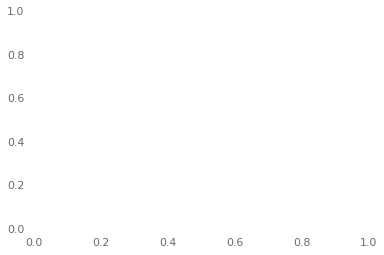

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from viz_defaults import *

In [3]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=color_list)

In [4]:
def plot_loss(curves, title="", tag=None):
    if tag == None:
        tag = title
    for path, label in curves:
        data = pd.read_json(path, lines=True)
        plt.plot(data.epoch, data.train_loss, label=label)
    plt.legend()
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel("pretraining loss")
    plt.tight_layout()
    plt.savefig(f"plots/pretraining_loss_{tag.replace(' ', '_').replace('=', '')}.pdf")

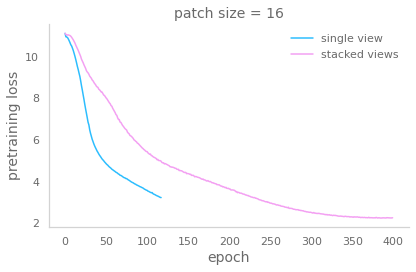

In [56]:
plot_loss(
    [
        ("pretraining_runs/vit_small_p16/log.txt", "single view"),
        ("pretraining_runs/stacked_views/vit_small_p16/log.txt", "stacked views"),
    ],
    "patch size = 16",
)

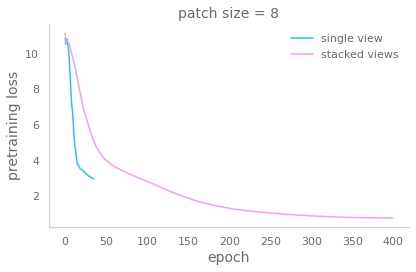

In [57]:
plot_loss(
    [
        ("pretraining_runs/vit_small_p8/log.txt", "single view"),
        ("pretraining_runs/stacked_views/vit_small_p8/log.txt", "stacked views"),
    ],
    "patch size = 8",
)

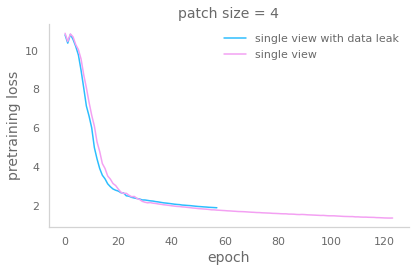

In [6]:
plot_loss(
    [
        (
            "pretraining_runs/one_channel_with_data_leak/vit_small_p4/log.txt",
            "single view with data leak",
        ),
        (
            "pretraining_runs/vit_small_p4/log.txt",
            "single view",
        ),
    ],
    "patch size = 4",
)

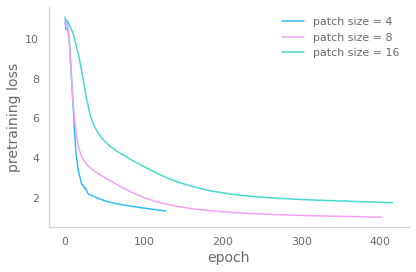

In [5]:
plot_loss(
    [
        (
            "pretraining_runs/vit_small_p4/log.txt",
            "patch size = 4",
        ),
        (
            "pretraining_runs/vit_small_p8/log.txt",
            "patch size = 8",
        ),
        (
            "pretraining_runs/vit_small_p16/log.txt",
            "patch size = 16",
        ),
    ],
    "single view",
    tag="pretraining_loss_by_patch_size",
)